# Desafio Cientista de dados

Desafio realizado para o processo seletivo nacional para a vaga remota de Cientista de Dados I da FIEC - Federação das Indústrias do Estado do Ceará

**-> Introdução:**

Imagine que você é Cientista de Dados e está responsável por um projeto no qual a
Federação das Indústrias está prestando consultoria para um e-commerce. O Cliente está
querendo aumentar o seu faturamento e devido a questões de negócios como problemas
com fornecedores, promoções mal planejadas, incidência de impostos e afins, algumas
vendas podem resultar em prejuízo Atualmente, essas informações não estão disponíveis
previamente. Dessa forma, faça um modelo que preveja o Lucro (Profit) ou prejuízo de
vendas feitos no e-commerce. Caso o algoritmo identifique que haverá prejuízo, o site irá
indeferir a compra, enviando-a para que um analista possa verificar o que está ocorrendo.


**-> Questão A:** 

Faça um Jupyter notebook, com a análise, exploração, visualização dos dados
e elaboração de um modelo que preveja a coluna Profit do Dataset disponibilizado.


**-> Questão Extra:** 

Faça um experimento no MLFlow ou uma DAG usando Airflow na qual as
etapas de extração, transformação, treino e previsão do modelo sejam separadas em
scripts/tasks.


In [1]:
#importando as bibliotecas e pacotes necessários:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#formatação incial:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
#Acessando os dados:

#caminho do arquivo na máquina
path = (r'...\dados.csv')
#importando arquivo csv
dados = pd.read_csv(path)
#criando cópia do arquivo para preservar original
df = dados.copy()

#### Compreendendo o conjunto de dados

Inicialmente, é importante compreender como os dados são disponibilizados no dataset e qual a lógica de sua composição e organização, para que assim possam ser planejar as próximas etapas.

In [4]:
#Visualizar apenas os primeiros registros
df.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [5]:
#Visualizar apenas os últimos registros
df.tail()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
725,56101,Not Specified,44,5347.13,Regular Air,1886.41,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,127.33,Regular Air,5.30,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,990.10,Regular Air,310.22,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,28.32,Regular Air,-14.35,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box
729,20003,Medium,39,796.08,Regular Air,30.29,Shirley Schmidt,Ontario,Corporate,Technology,Computer Peripherals,Belkin 105-Key Black Keyboard,Small Box


In [6]:
#visualizar conjunto completo
#df

In [7]:
#consulta número respectivo de linhas e colunas:

df.shape

(730, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [9]:
#df

In [10]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Order_Priority', 'Ship_Mode', 'Customer_Name', 'Region',
       'Customer_Segment', 'Product_Category', 'Product_Sub-Category',
       'Product_Name', 'Product_Container'],
      dtype='object')

In [11]:
#tratando os dados com formato genérico Object:

# Itera sobre as colunas do DataFrame
for column in df.columns:
    # Verifica se o tipo da coluna é 'object'
    if df[column].dtype == 'object':
        # Converte os dados para tipo string
        df[column] = df[column].astype(str)

In [12]:
# Remover a coluna 'Profit' de sua posição atual
profit_col = df.pop('Profit')

# Adicionar a coluna 'Profit' na última posição
df['Profit'] = profit_col

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Customer_Name         730 non-null    object 
 6   Region                730 non-null    object 
 7   Customer_Segment      730 non-null    object 
 8   Product_Category      730 non-null    object 
 9   Product_Sub-Category  730 non-null    object 
 10  Product_Name          730 non-null    object 
 11  Product_Container     730 non-null    object 
 12  Profit                730 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [14]:
#Exibe a soma dos registros nulos de cada atributo:

df.isnull().sum()

Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
Profit                  0
dtype: int64

In [15]:
#Verificar quantos valores únicos existem em cada atributo
df.nunique()

Order_ID                571
Order_Priority            5
Order_Quantity           50
Sales                   729
Ship_Mode                 2
Customer_Name           173
Region                    6
Customer_Segment          4
Product_Category          3
Product_Sub-Category     15
Product_Name            445
Product_Container         3
Profit                  727
dtype: int64

In [16]:
#selecionando atributos com nenos de 16 valores únicos

unique = df.nunique()

# Seleciona as colunas com menos de 16 valores únicos
categ_columns = unique[unique < 16].index.tolist()
categ_columns

['Order_Priority',
 'Ship_Mode',
 'Region',
 'Customer_Segment',
 'Product_Category',
 'Product_Sub-Category',
 'Product_Container']

In [17]:
# Iterar sobre cada um e imprimir os valores únicos

print('Valores únicos:')
print('***************')
for col in categ_columns:
    valores_unicos = df[col].unique()
    #print(f"Atributo '{atributo}':")
    print(valores_unicos)
    print()

Valores únicos:
***************
['High' 'Not Specified' 'Low' 'Medium' 'Critical']

['Express Air' 'Regular Air']

['Nunavut' 'Northwest Territories' 'Atlantic' 'West' 'Ontario' 'Prarie']

['Corporate' 'Consumer' 'Home Office' 'Small Business']

['Office Supplies' 'Furniture' 'Technology']

['Storage & Organization' 'Office Furnishings' 'Chairs & Chairmats'
 'Appliances' 'Copiers and Fax' 'Office Machines' 'Tables'
 'Telephones and Communication' 'Scissors, Rulers and Trimmers' 'Labels'
 'Paper' 'Binders and Binder Accessories' 'Computer Peripherals'
 'Envelopes' 'Pens & Art Supplies']

['Large Box' 'Medium Box' 'Small Box']



In [18]:
#Agrupando as colunas:

# Listas vazias para os resultados
continuous = []
categorical = []

# contêm os atributos categóricos vistos anteriormente
categorical = [coluna for coluna in df.columns if df[coluna].dtype == 'object' and df[coluna].nunique() < 16]

#categóricas de alta cardinalidade:
categorical_highcard = [coluna for coluna in df.columns if df[coluna].dtype == 'object' and df[coluna].nunique() > 16]

# Lista das colunas numéricas (dtype 'int64' ou 'float64')
continuous = [coluna for coluna in df.columns if df[coluna].dtype in ['int64', 'float64']]


In [19]:
categorical, categorical_highcard, continuous

(['Order_Priority',
  'Ship_Mode',
  'Region',
  'Customer_Segment',
  'Product_Category',
  'Product_Sub-Category',
  'Product_Container'],
 ['Customer_Name', 'Product_Name'],
 ['Order_ID', 'Order_Quantity', 'Sales', 'Profit'])

#### Entendendo as variáveis numéricas:

In [20]:
df.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.00,730.00,730.00,730.00
mean,29721.60,24.86,1502.78,207.48
std,17350.56,14.18,2893.94,878.63
min,35.00,1.00,8.60,-4437.91
25%,14479.00,13.00,171.10,-77.13
50%,29350.50,25.00,438.70,0.04
75%,44978.50,37.00,1480.86,180.00
max,59909.00,50.00,27663.92,8417.57


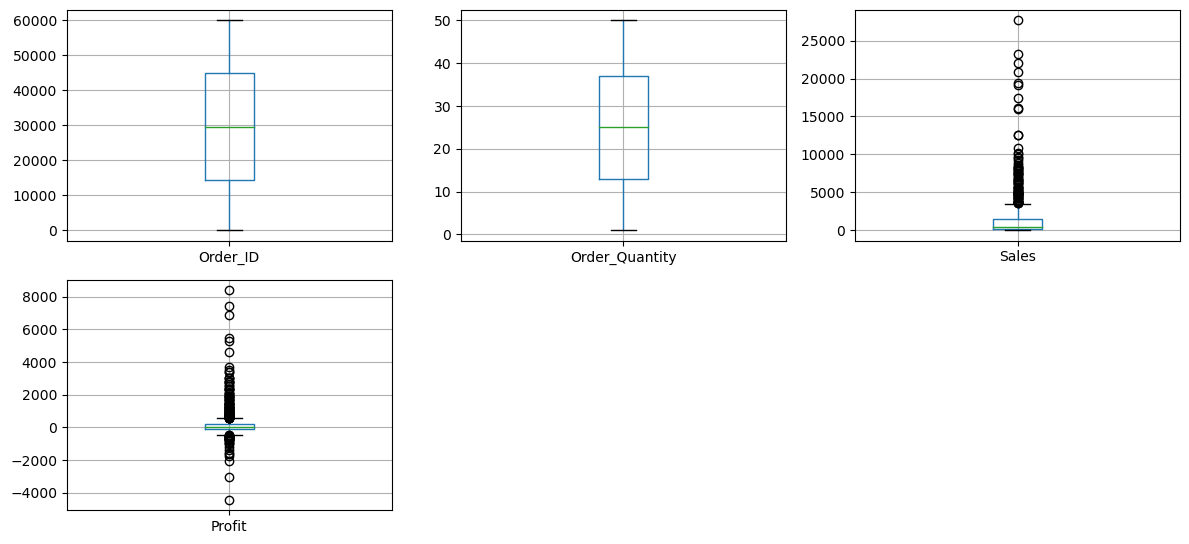

In [21]:
# Plot das variáveis contínuas

# Tamanho da área de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

C:\Users\Mariana\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


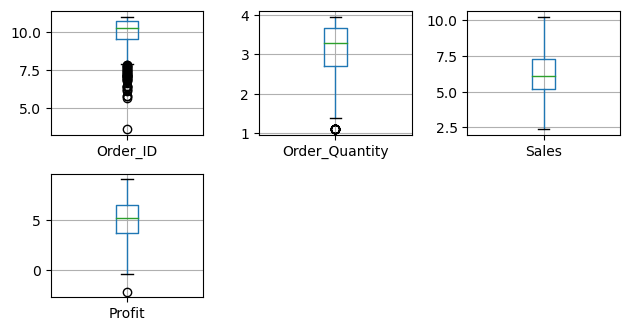

In [22]:
# Estabilizando a variância e tornar a distribuição dos dados mais próxima da normalidade
# Transformação de log nas variáveis contínuas
for coluna in continuous:
    df[coluna] = np.log1p(1 + df[coluna])
    
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()

#### Correlação entre os atributos Sales e Profit

<AxesSubplot:>

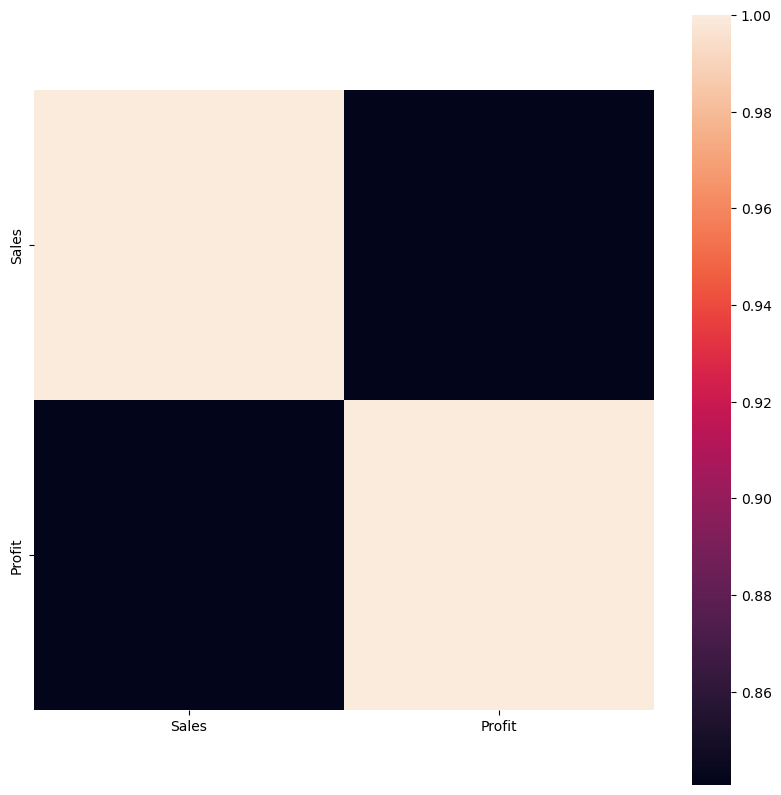

In [23]:

# Área de plotagem
plt.figure(figsize = (10,10))

# Matriz de Correlação 
sns.heatmap(df[['Sales',
                'Profit']].corr(), vmax = 1., square = True)

In [24]:
# Calcula a correlação entre 'Sales' e 'Profit'
correlation = df[['Sales', 'Profit']].corr()
correlation

,Sales,Profit
Sales,1.00,0.84
Profit,0.84,1.00


In [25]:
# Retorna o valor numérico que representa a correlação entre 'Sales' e 'Profit'
correlation_value = correlation.loc['Sales', 'Profit']

print("Correlação entre 'Sales' e 'Profit':", correlation_value)

Correlação entre 'Sales' e 'Profit': 0.8407425614987901


In [26]:
# Conta a frequência de valores positivos e negativos na coluna 'Profit'
frequencia_profit = df['Profit'].apply(lambda x: 'positivo' if x > 0 else 'negativo').value_counts()

# Acessa a contagem de valores positivos e negativos
quantidade_positivos = frequencia_profit.get('positivo', 0)
quantidade_negativos = frequencia_profit.get('negativo', 0)

print("Número de valores positivos na coluna 'Profit':", quantidade_positivos)
print("Número de valores negativos na coluna 'Profit':", quantidade_negativos)


Número de valores positivos na coluna 'Profit': 368
Número de valores negativos na coluna 'Profit': 362


#### Preparando os dados para modelagem

In [27]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
encoder = LabelEncoder()

In [28]:
# codificação das colunas categóricas
for col in categorical:
    df[col] = encoder.fit_transform(df[col])

In [29]:
# Removendo colunas irrelevantes
data_reduced = df.drop(['Order_ID', 'Customer_Name', 'Product_Name'], axis=1)

In [30]:
data_reduced.head(), data_reduced.describe()

(   Order_Priority  Order_Quantity  Sales  Ship_Mode  Region  Customer_Segment  \
 0               1            3.14   7.93          0       2                 1   
 1               1            3.61   8.13          0       1                 0   
 2               4            2.20   7.62          0       1                 1   
 3               2            2.08   6.81          0       1                 2   
 4               3            3.26   7.06          0       1                 3   
 
    Product_Category  Product_Sub-Category  Product_Container  Profit  
 0                 1                    12                  0     NaN  
 1                 0                     7                  0    6.61  
 2                 1                    12                  0     NaN  
 3                 0                     2                  0     NaN  
 4                 1                    12                  0     NaN  ,
        Order_Priority  Order_Quantity  Sales  Ship_Mode  Region  \
 coun

In [31]:
# Categoriza 'Profit' em lucrot (1) e prejuízo (0)
data_reduced['Profit_Category'] = (data_reduced['Profit'] > 0).astype(int)

In [32]:
# Conta o número de lucros e perdas
profit_loss_counts = data_reduced['Profit_Category'].value_counts()

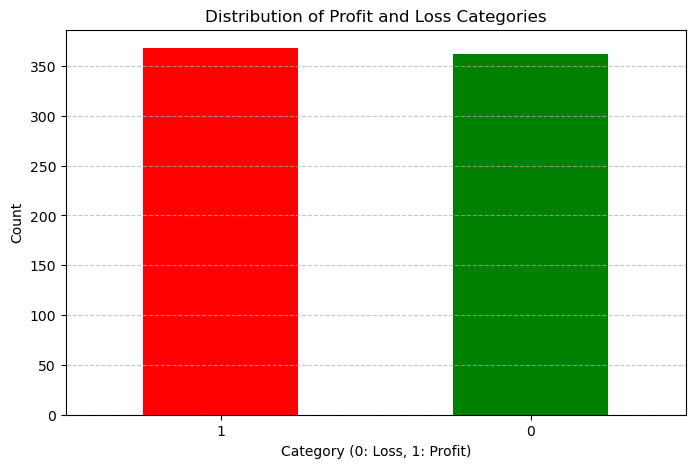

In [33]:
# Plot da distribuição
plt.figure(figsize=(8, 5))
profit_loss_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Profit and Loss Categories')
plt.xlabel('Category (0: Loss, 1: Profit)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [34]:
profit_loss_counts

1    368
0    362
Name: Profit_Category, dtype: int64

A distribuição da variável alvo, categorizada em lucro (1) e perda (0), está perfeitamente equilibrada com 365 instâncias cada.

In [35]:
# cálculo da matriz de correlação
correlation_matrix = data_reduced.corr()

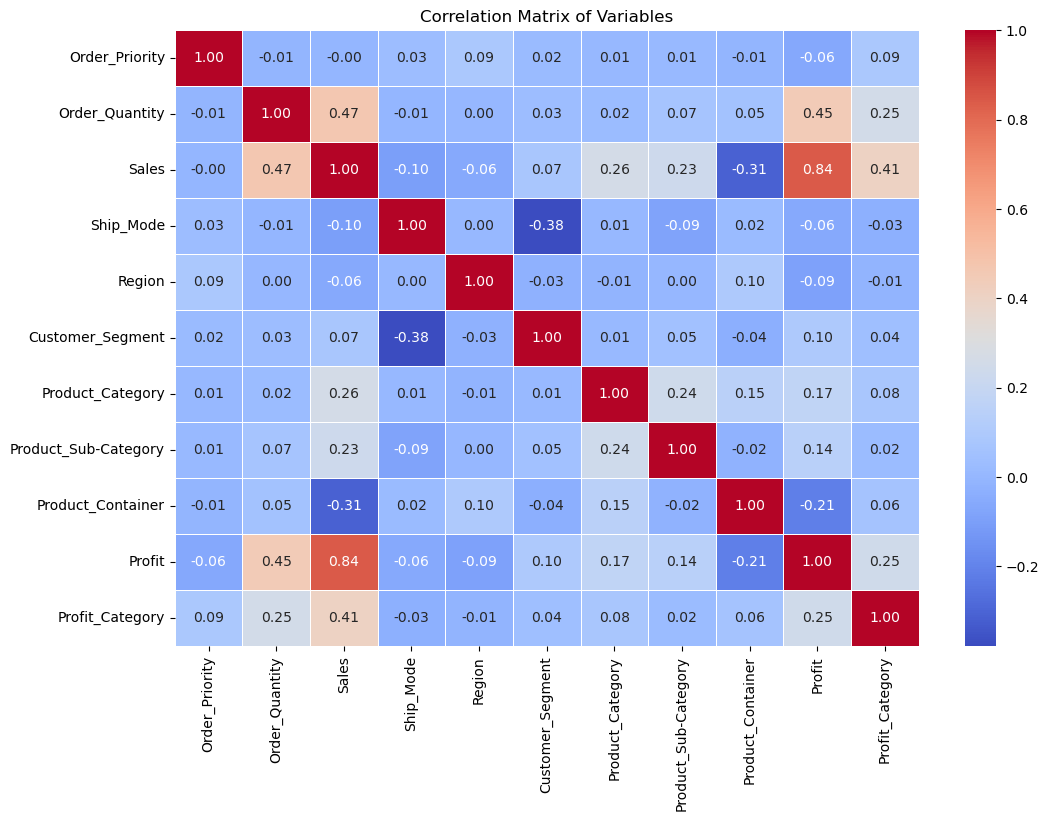

In [36]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

Examina como os números das vendas se relacionam com o fato de uma transação resultar em lucro ou perda por meio de gráficos de dispersão.

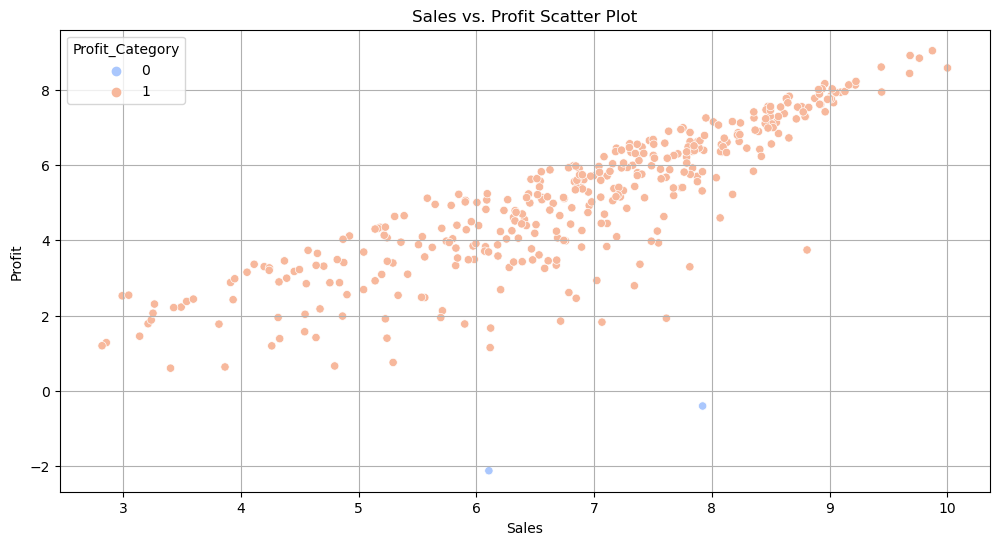

In [37]:
# Scatter plot de vendas vs lucros
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data_reduced, x='Sales', y='Profit', hue='Profit_Category', palette='coolwarm')
plt.title('Sales vs. Profit Scatter Plot')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

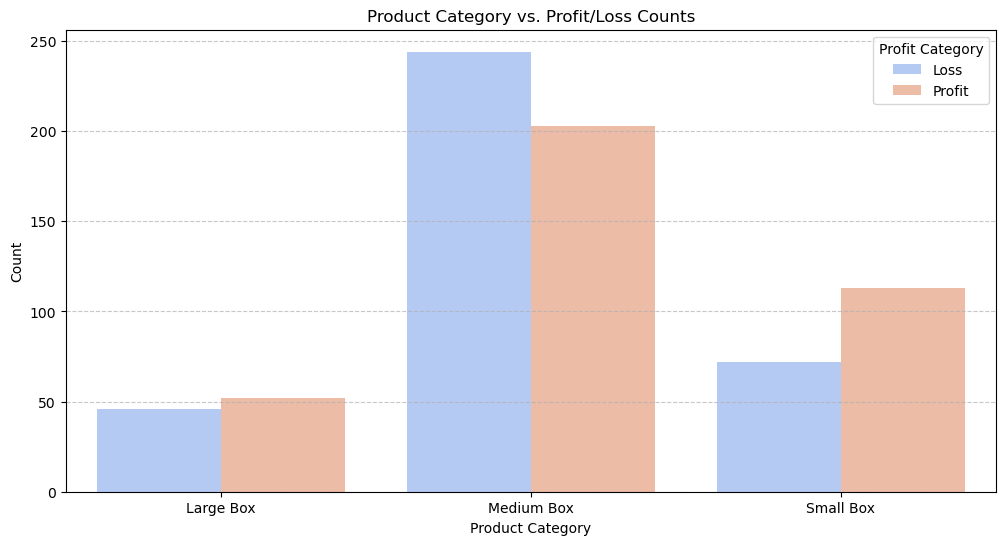

In [38]:
# Bar plot para categoria de produto vs.contagem de lucro/prejuízo
plt.figure(figsize=(12, 6))
sns.countplot(data=data_reduced, x='Product_Category', hue='Profit_Category', palette='coolwarm')
plt.title('Product Category vs. Profit/Loss Counts')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(ticks=data_reduced['Product_Category'].unique(), labels=encoder.inverse_transform(data_reduced['Product_Category'].unique()))
plt.legend(title='Profit Category', labels=['Loss', 'Profit'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Criação de modelo Preditivo

Será criado um modelo de aprendizado de máquina usando regressão logística, um método simples, porém poderoso, para tarefas de classificação binária. Treinarei este modelo para prever se uma transação resultará em lucro ou perda.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [40]:
# Features e target variable
X = data_reduced.drop(['Profit', 'Profit_Category'], axis=1)
y = data_reduced['Profit_Category']

In [41]:
# SDividindo o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Iniciando o modelo de Regrssão Logística
logreg = LogisticRegression(max_iter=1000)

In [43]:
# Primeiro modelo
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [44]:
# Prevendo no conjunto de testes
y_pred = logreg.predict(X_test)

In [45]:
# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [46]:
accuracy, report

(0.7191780821917808,
 '              precision    recall  f1-score   support\n\n           0       0.71      0.72      0.71        71\n           1       0.73      0.72      0.72        75\n\n    accuracy                           0.72       146\n   macro avg       0.72      0.72      0.72       146\nweighted avg       0.72      0.72      0.72       146\n')

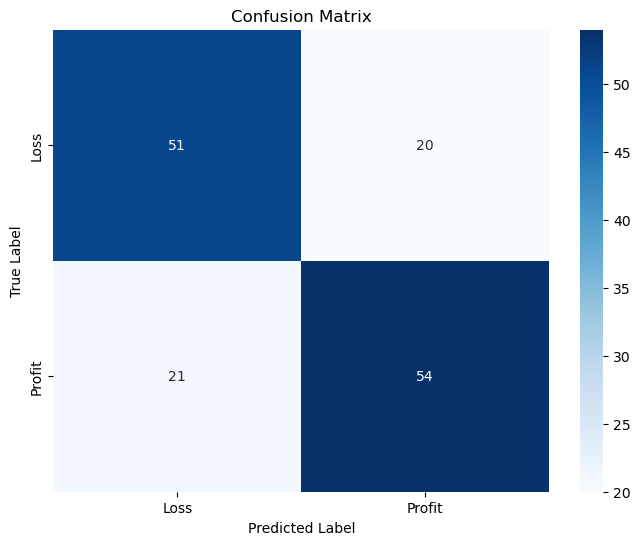

In [47]:
from sklearn.metrics import confusion_matrix

# calculo da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Profit'], yticklabels=['Loss', 'Profit'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Implementando um modelo Randon Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [49]:
# Features e target variable
#X = data.drop(['Order_ID', 'Customer_Name', 'Product_Name', 'Profit'], axis=1)
#y = (data['Profit'] > 0).astype(int)

In [50]:
# Encode das colunas categóricas
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_cols = ['Order_Priority', 'Ship_Mode', 'Region', 'Customer_Segment', 'Product_Category', 'Product_Sub-Category', 'Product_Container']
for col in categorical_cols:
    X[col] = encoder.fit_transform(X[col])

In [51]:
# Dividindo em treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# IIniciando Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [53]:
# Predição de set de treste
y_pred = rf_classifier.predict(X_test)

In [54]:
# Avaliando
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Random Forest model: {:.2f}%".format(accuracy * 100))

Accuracy of the Random Forest model: 79.45%


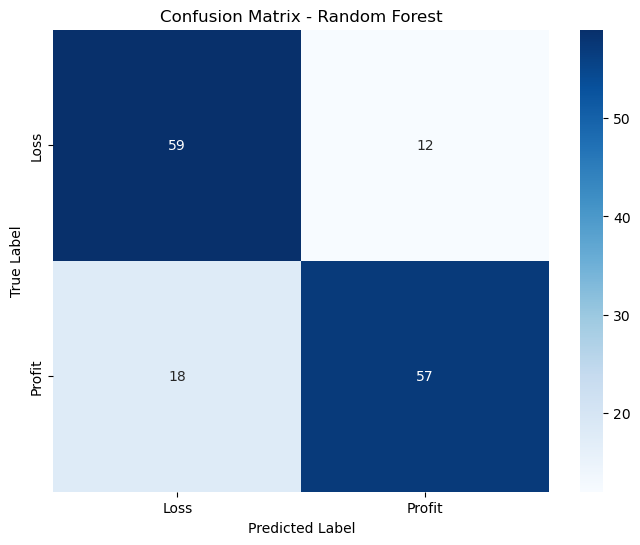

In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Loss', 'Profit'], yticklabels=['Loss', 'Profit'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

A importância do recurso do Random Forest Model pode ser útil para analisar as importâncias do recurso fornecidas pelo modelo. Isso pode ajudar a identificar quais recursos são mais influentes na previsão do resultado.

In [56]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                      importance
Sales                       0.39
Order_Quantity              0.20
Product_Sub-Category        0.18
Order_Priority              0.06
Region                      0.06
Product_Category            0.04
Product_Container           0.03
Customer_Segment            0.03
Ship_Mode                   0.02
